# Zonal and Meridional profiles 

This notebook shows how to plot the zonal or meridional profiles for a variable of choice.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua import Reader
from aqua.graphics import plot_lat_lon_profiles

/LUMI_TYKKY_KrYnNEo/miniconda/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


We import some sample data, specifically the monthly ERA5 dataset, along with the IFS-NEMO data:

In [3]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="lra-r100-monthly")
data = reader.retrieve()

reader_ref = Reader(model="ERA5", exp="era5", source="monthly")
data_ref = reader_ref.retrieve()


2025-08-09 14:07:02 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-08-09 14:07:02 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the 

This is how the dataset is characterised:

In [4]:
data

<xarray.Dataset> Size: 19GB
Dimensions:    (time: 146, lat: 180, lon: 360, level: 75, plev: 19)
Coordinates:
  * time       (time) datetime64[ns] 1kB 1990-01-01 1990-02-01 ... 2002-02-01
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * level      (level) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    idx_level  (level) int64 600B dask.array<chunksize=(75,), meta=np.ndarray>
  * plev       (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Data variables: (12/36)
    2t         (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hc700m     (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    siconc     (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    sithick    (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    so         (time, level, lat, lon) float64 6GB dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    sos        (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...         ...
    t          (time, plev, lat, lon) float64 1GB dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
    tcc        (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tciw       (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tclw       (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u          (time, plev, lat, lon) float64 1GB dask.array<chunksize=(9, 19, 180, 360), meta=np.ndarray>
    v          (time, plev, lat, lon) float64 1GB dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2025-08-09 14:07:09 AQUA💧: Retrieved from IFS-NEMO_historical...

We select the first variable, `tos`:

In [7]:
tos = data["tos"]
tos_ref = data_ref["tos"]

tos_single = tos.isel(time=1)
tos_ref_single = tos_ref.isel(time=1)

tos_zonal = tos_single.mean(dim='lon')
tos_ref_zonal = tos_ref_single.mean(dim='lon')

## Single profile with one line

And this is how the single zonal profile, as well as the ERA5 reference data, can be plotted:

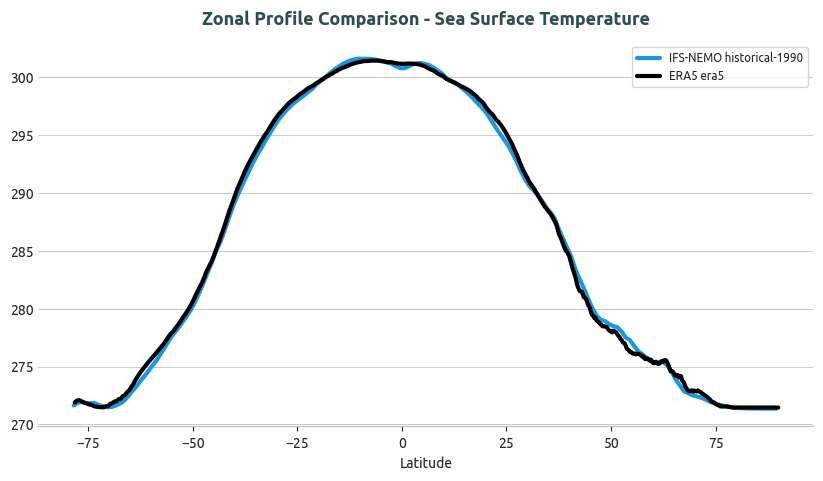

In [8]:
fig_with_ref, ax_with_ref = plot_lat_lon_profiles(
    data=tos_zonal,
    ref_data=tos_ref_zonal,
    title="Zonal Profile Comparison - Sea Surface Temperature"
)

## Single profile with multiple lines

We select other two variables from the ERA5 dataset, `t` and `t_plot`, but the other lines can also be different models for the same variable, for instance.

In [12]:
t_model = model_data["t"]  # Atmospheric temperature on pressure levels
t2m_model = model_data["2t"]  # 2m temperature

# Select same timestep and calculate zonal means
t_model_single = t_model.isel(time=1)
t2m_model_single = t2m_model.isel(time=1)

# Select specific pressure levels and calculate zonal means
t_1000_zonal = t_model_single.sel(plev=100000).mean(dim='lon')  # 1000 hPa
t_850_zonal = t_model_single.sel(plev=85000).mean(dim='lon')   # 850 hPa
t_700_zonal = t_model_single.sel(plev=70000).mean(dim='lon')   # 700 hPa
t2m_zonal = t2m_model_single.mean(dim='lon')  # Surface

data_list = [t2m_zonal, t_1000_zonal, t_850_zonal, t_700_zonal]
labels_list = ["2m Temperature", "1000 hPa Temperature", "850 hPa Temperature", "700 hPa Temperature"]

And here we use the `plot_lat_lon_profiles` function specifying the `data_list` argument, so that multiple lines are allowed to be plotted:

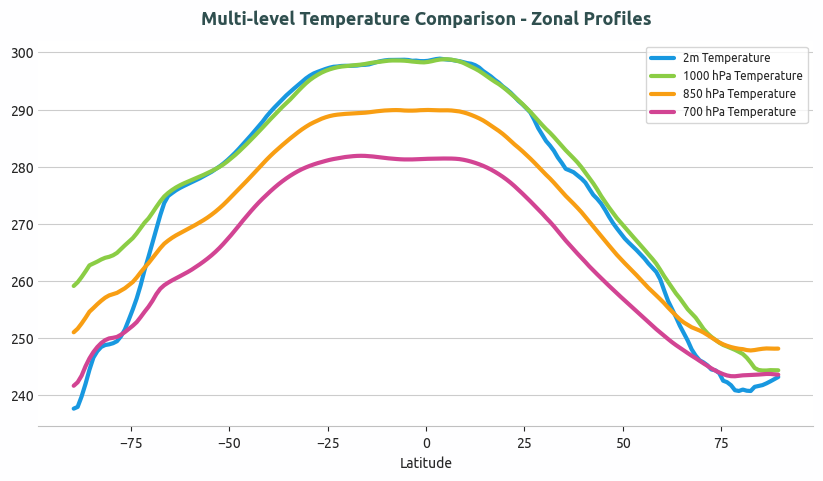

In [ ]:
fig_multi, ax_multi = plot_lat_lon_profiles(
    data=data_list,
    data_labels=labels_list,
    title="Multi-level Temperature Comparison - Zonal Profiles"
)

## Multiple subplots of a single line

We now plot, for `tos`, a more complex plot composed by 4 seasonal subplots, where the seasonal mean is plotted for the variable of interest, and a fifth larger plot, which shows the annual mean for the zonal/longitudinal profile.

In [ ]:
from aqua import plot_lines

In [ ]:
tos

<xarray.DataArray 'tos' (time: 1008, lat: 721, lon: 1440)> Size: 4GB
dask.array<getitem, shape=(1008, 721, 1440), dtype=float32, chunksize=(12, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Attributes:
    long_name:     Sea surface temperature
    units:         K
    code:          34
    table:         128
    history:       \n2025-06-05 18:43:00 AQUA💧: Variable renamed tos from SST...
    paramId:       262101
    shortName:     tos
    AQUA_model:    ERA5
    AQUA_exp:      era5
    AQUA_source:   monthly
    AQUA_catalog:  obs
    AQUA_version:  0.16.0-alpha

The legend is shown only for the annual plot and it adds information on the time frequency, if monthly or annual.

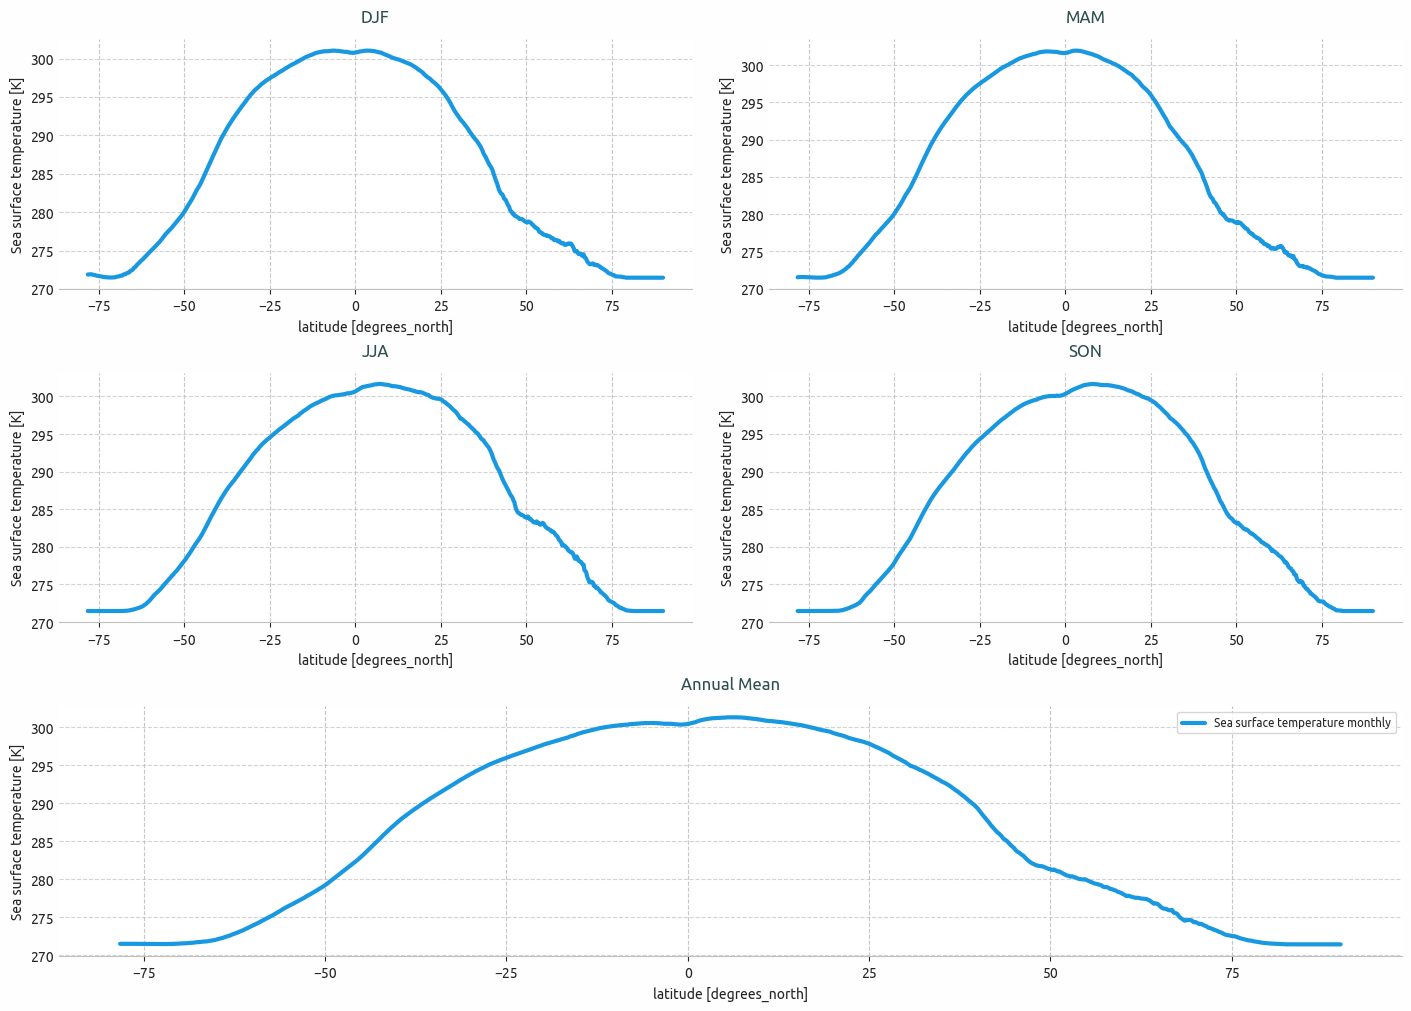

In [ ]:
plot_seasonal_profile = plot_lines(tos)

## Multiple subplots of multiple lines

We now plot the same kind of plot but adding more lines for each subplot. In this case, multiple variables (or multiple sources for the same variable) can be compared together for each season and for the annual mean.


In [ ]:
t_single = t.isel(plev=1)
data_list = [tos, t_single, t2m]

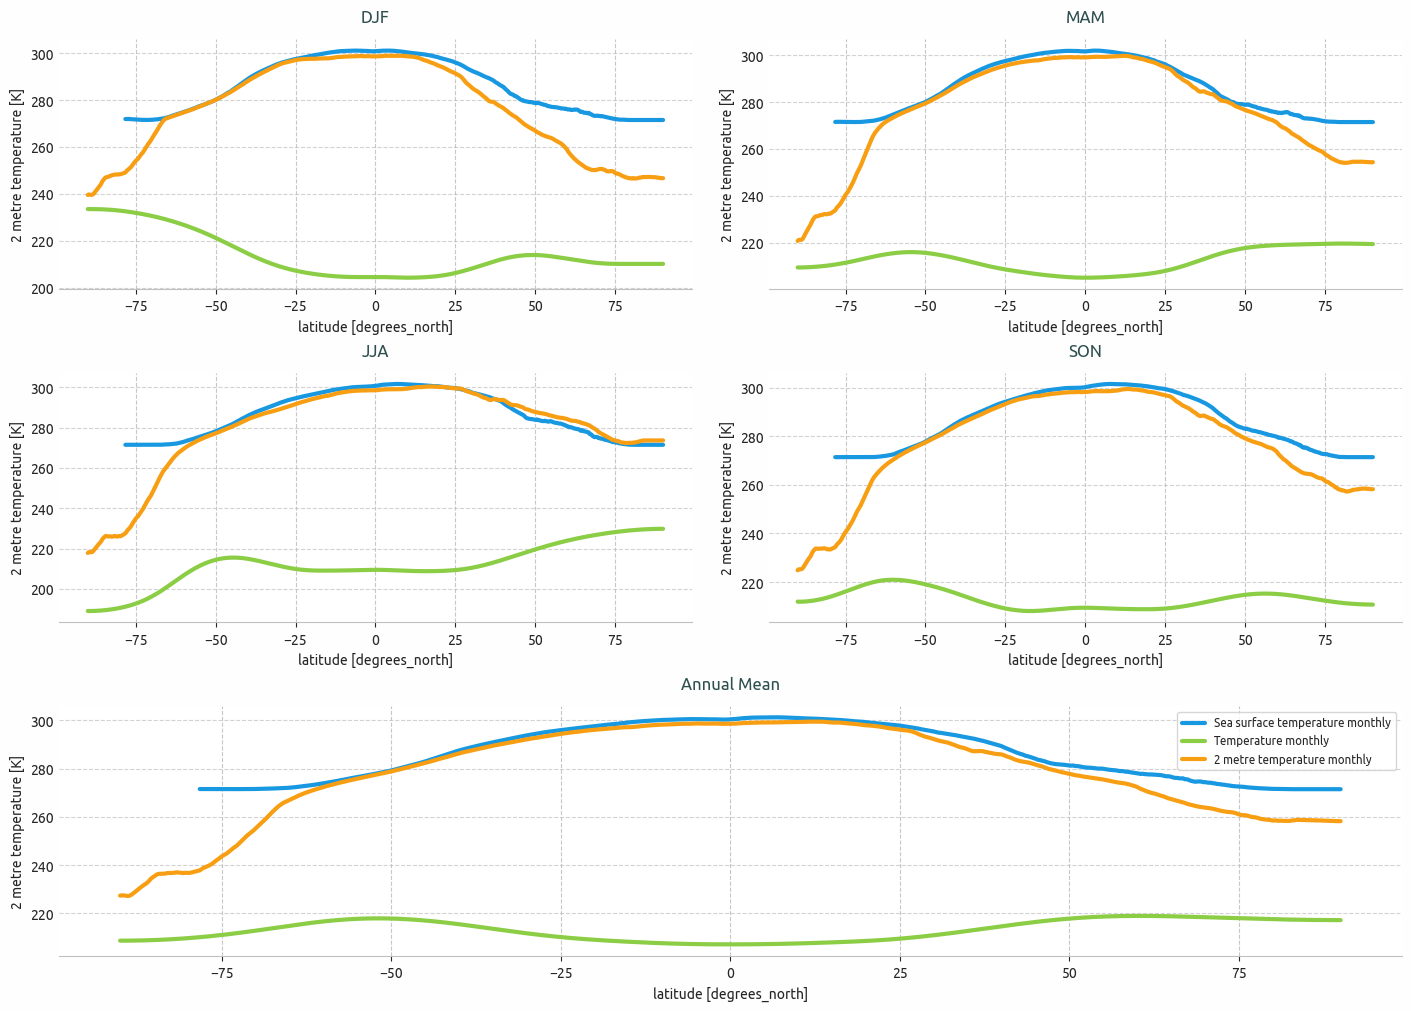

In [ ]:
plot_multiple_seasonal_profiles = plot_lines(data_list)